# Keylevels detection

### Import Library

In [136]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [137]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [138]:
data = dataset.copy()

In [139]:
data = data[data.index > '2020-11-01 00:00:00']

In [140]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2025-02-14 14:15:00,1343.0,1343.0,1340.3,1341.3,7141
2025-02-14 14:20:00,1340.9,1341.9,1340.5,1341.4,4593
2025-02-14 14:25:00,1341.1,1342.5,1340.7,1342.5,4207


In [141]:
back_bar = 20
next_bar = back_bar -1
data['max_prev'] = data['High'].rolling(back_bar).max()
data['max_next'] = data['High'].shift(-next_bar).rolling(back_bar).max()
data['min_prev'] = data['Low'].rolling(back_bar).min()
data['min_next'] = data['Low'].shift(-next_bar).rolling(back_bar).min()

In [142]:
data['RSI'] = ta.rsi(data["Close"], length=back_bar)
data["Volume_Change"] = data["Volume"] / data["Volume"].shift(1)
data["ATR"] = ta.atr(data["High"], data["Low"], data["Close"], length=back_bar)
adx = ta.adx(data['High'], data['Low'], data['Close'], length = 52)
data = data.assign(ADX=adx['ADX_52'])

In [143]:
data.dropna(inplace=True)
data['is_max_last20'] = data.apply(lambda r: 1 if r['High'] == r['max_prev'] else 0, axis=1)
data['is_min_last20'] = data.apply(lambda r: 1 if r['Low'] == r['min_prev'] else 0, axis=1)
data['is_peak'] = data.apply(lambda r: 1 if (r['is_max_last20'] == 1 and r['High'] == r['max_next']) else 0, axis=1)
data['is_valley'] = data.apply(lambda r: 1 if (r['is_min_last20'] == 1 and r['Low'] == r['min_next']) else 0, axis=1)

In [144]:
data[data.is_max_last20 == 1]

,Open,High,Low,Close,Volume,max_prev,max_next,min_prev,min_next,RSI,Volume_Change,ATR,ADX,is_max_last20,is_min_last20,is_peak,is_valley
Date,,,,,,,,,,,,,,,,,
2020-11-04 10:10:00,909.1,910.5,909.1,910.0,5236,910.5,914.6,906.2,909.1,59.589855,2.908889,1.270593,7.844661,1,0,0,0
2020-11-04 10:15:00,910.2,911.5,909.8,911.5,3514,911.5,914.6,906.7,909.8,64.173720,0.671123,1.292116,7.936969,1,0,0,0
2020-11-04 10:20:00,911.8,911.8,911.0,911.1,2423,911.8,914.6,906.7,910.5,62.193420,0.689528,1.267452,8.048104,1,0,0,0
2020-11-04 10:35:00,911.2,912.5,910.8,912.5,2731,912.5,914.6,906.7,910.8,65.366760,1.639256,1.245976,8.341517,1,0,0,0
2020-11-04 10:40:00,912.5,913.3,912.3,913.2,3192,913.3,914.6,906.7,911.8,67.167471,1.168803,1.233654,8.542184,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-13 13:35:00,1337.9,1338.3,1336.6,1336.9,4509,1338.3,1349.0,1327.4,1333.4,62.975523,0.653384,1.267534,10.824375,1,0,0,0
2025-02-13 13:45:00,1337.2,1338.5,1336.5,1336.9,4460,1338.5,1349.0,1329.4,1333.4,62.387201,2.003594,1.281950,11.114416,1,0,0,0
2025-02-14 09:00:00,1345.2,1348.9,1345.2,1347.6,11413,1348.9,1349.0,1333.0,1344.7,77.120830,1.767265,1.825396,11.929291,1,0,0,0


In [145]:
data[data.is_peak == 1]

,Open,High,Low,Close,Volume,max_prev,max_next,min_prev,min_next,RSI,Volume_Change,ATR,ADX,is_max_last20,is_min_last20,is_peak,is_valley
Date,,,,,,,,,,,,,,,,,
2020-11-04 14:00:00,916.6,918.1,916.4,916.7,5942,918.1,918.1,911.8,910.2,65.334735,1.134402,1.380046,12.900553,1,0,1,0
2020-11-05 13:00:00,918.5,919.9,918.5,919.1,2509,919.9,919.9,914.5,910.0,64.497819,10.542017,1.091494,14.197804,1,0,1,0
2020-11-09 11:10:00,919.4,920.4,919.4,919.6,2289,920.4,920.4,915.5,916.0,66.841595,1.021875,1.127638,13.574348,1,0,1,0
2020-11-10 09:00:00,935.0,935.3,933.6,933.9,3434,935.3,935.3,916.0,928.1,83.339998,0.650009,1.712523,15.223477,1,0,1,0
2020-11-10 13:50:00,931.2,932.3,931.2,931.6,4199,932.3,932.3,927.5,919.6,62.251777,0.758627,1.364008,19.103134,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07 13:40:00,1343.9,1347.4,1343.8,1345.3,14175,1347.4,1347.4,1337.6,1330.0,67.554456,2.432224,1.478064,15.684380,1,0,1,0
2025-02-10 13:35:00,1335.0,1337.6,1334.9,1337.0,4192,1337.6,1337.6,1331.5,1330.0,58.411082,1.088831,1.686892,12.533900,1,0,1,0
2025-02-12 10:05:00,1340.6,1342.0,1340.5,1340.6,5056,1342.0,1342.0,1328.9,1338.6,67.973305,1.176635,1.313318,9.794027,1,0,1,0


## Classification by current price & prev price

In [146]:
# Entry Long-Short late 1 bar(5 minutes) but it's not problem

In [147]:
data['prev_Close'] = data['Close'].shift(1)
data['prev_Open'] = data['Open'].shift(1)
data['prev_High'] = data['High'].shift(1)
data['prev_Low'] = data['Low'].shift(1)
data['next_Close'] = data['Close'].shift(-1)
data['next_Open'] = data['Open'].shift(-1)
data['next_High'] = data['High'].shift(-1)
data['next_Low'] = data['Low'].shift(-1)

In [148]:
ai_pdata = data[data.is_max_last20 == 1] # data for classifying peak or not

In [149]:
from sklearn.model_selection import train_test_split
# Define Features and Target Variable
features = ["prev_Open", "prev_Close", "prev_Low", "prev_High","Open", "Close", "Low", "High", "next_Close", "next_Open", "next_High", "next_Low"]
X = ai_pdata[features]
y = ai_pdata["is_peak"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
#Fix Imbalanced Classes
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto")
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### Train & test by RandomForestClassifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [152]:
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

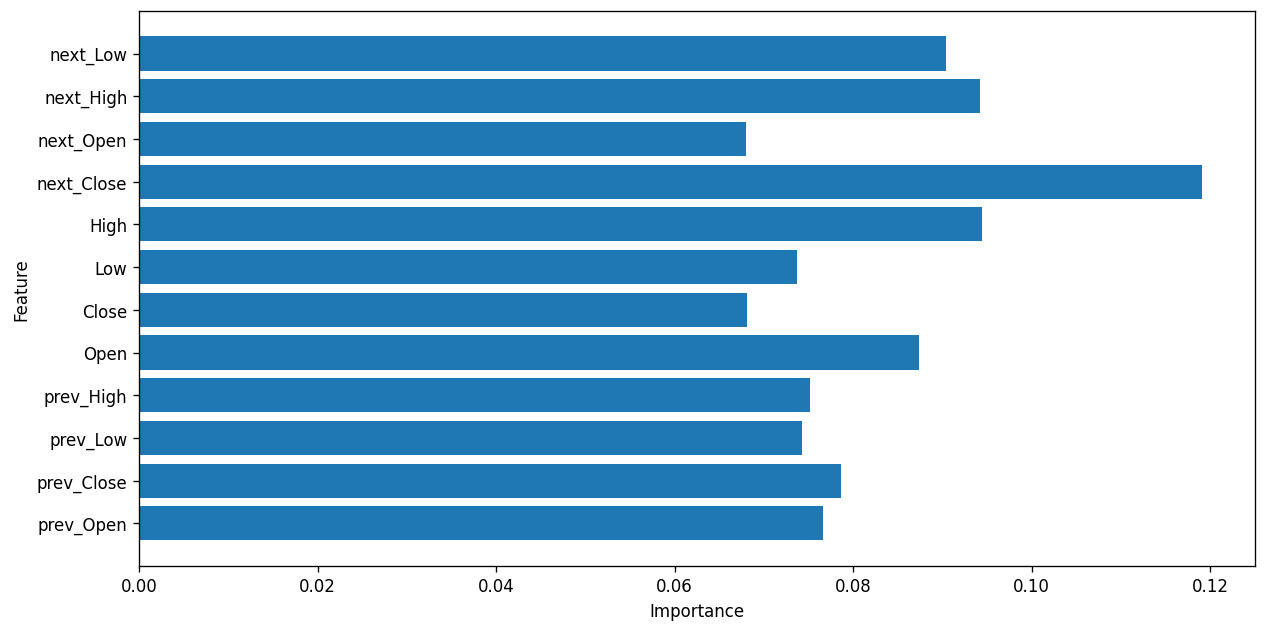

In [153]:
importances = model.feature_importances_
feature_names = X_resampled.columns

plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [154]:
# Predictions
y_pred = model.predict(X_test)

In [155]:
# Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7635714285714286
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1180
           1       0.29      0.34      0.31       220

    accuracy                           0.76      1400
   macro avg       0.58      0.59      0.58      1400
weighted avg       0.78      0.76      0.77      1400



In [156]:
probability = model.predict_proba(X_test)
probability

array([[0.82, 0.18],
       [0.54, 0.46],
       [0.55, 0.45],
       ...,
       [0.67, 0.33],
       [0.57, 0.43],
       [0.9 , 0.1 ]])

In [157]:
result_data = X_test.copy()
result_data['is_peak'] = y_test
# result_data['predict'] = y_pred
result_data = result_data.assign(predict=y_pred)
result_data['prob_0'] = probability[:,0] 
result_data['prob_1'] = probability[:,1]
result_data

,prev_Open,prev_Close,prev_Low,prev_High,Open,Close,Low,High,next_Close,next_Open,next_High,next_Low,is_peak,predict,prob_0,prob_1
Date,,,,,,,,,,,,,,,,
2024-10-15 10:00:00,1368.0,1368.0,1367.2,1368.6,1368.1,1368.9,1368.0,1369.6,1368.0,1369.0,1369.0,1367.8,1,0,0.82,0.18
2022-06-30 09:40:00,1261.8,1262.5,1261.8,1263.4,1262.6,1262.5,1262.0,1263.7,1262.5,1262.5,1263.1,1262.2,0,0,0.54,0.46
2021-11-12 14:20:00,1520.9,1525.9,1520.8,1526.1,1526.4,1528.3,1526.0,1530.5,1527.9,1528.4,1529.7,1526.3,0,0,0.55,0.45
2020-12-14 09:20:00,1015.0,1015.4,1014.7,1016.1,1015.5,1015.9,1015.5,1016.3,1015.6,1015.9,1016.1,1015.5,0,0,0.93,0.07
2023-07-24 09:55:00,1187.7,1188.0,1187.6,1188.5,1188.0,1188.0,1188.0,1189.3,1186.8,1188.0,1188.0,1186.7,1,1,0.09,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-05 13:00:00,1125.5,1125.7,1125.5,1125.7,1125.8,1126.0,1125.5,1126.4,1125.0,1125.9,1126.0,1125.0,0,0,0.58,0.42
2021-10-08 09:50:00,1458.1,1458.7,1458.1,1458.9,1458.7,1460.7,1458.7,1460.9,1461.4,1460.8,1461.9,1460.4,0,0,0.98,0.02
2024-11-07 09:00:00,1341.0,1341.0,1341.0,1341.0,1342.0,1342.7,1341.8,1343.6,1342.5,1342.6,1342.8,1342.3,1,0,0.67,0.33


In [158]:
len(result_data[result_data.is_peak == result_data.predict]) / len(result_data)

0.7635714285714286

In [159]:
result_data[result_data.is_peak != result_data.predict]

,prev_Open,prev_Close,prev_Low,prev_High,Open,Close,Low,High,next_Close,next_Open,next_High,next_Low,is_peak,predict,prob_0,prob_1
Date,,,,,,,,,,,,,,,,
2024-10-15 10:00:00,1368.0,1368.0,1367.2,1368.6,1368.1,1368.9,1368.0,1369.6,1368.0,1369.0,1369.0,1367.8,1,0,0.82,0.18
2025-02-10 13:35:00,1335.6,1335.0,1334.6,1336.7,1335.0,1337.0,1334.9,1337.6,1334.9,1337.4,1337.5,1334.6,1,0,0.70,0.30
2024-05-28 14:45:00,1291.9,1291.9,1291.9,1291.9,1292.5,1292.5,1292.5,1292.5,1290.9,1292.0,1292.3,1290.5,1,0,0.68,0.32
2021-10-22 13:05:00,1492.4,1493.3,1492.4,1493.4,1493.3,1494.0,1493.3,1495.0,1493.6,1494.0,1494.3,1493.3,1,0,0.69,0.31
2021-03-19 14:20:00,1206.5,1208.7,1206.5,1209.0,1209.0,1209.0,1208.9,1210.0,1208.4,1209.4,1209.4,1208.0,1,0,0.64,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-28 10:35:00,1416.0,1416.3,1415.2,1416.5,1416.2,1416.0,1415.7,1417.5,1412.8,1415.7,1416.0,1411.6,0,1,0.45,0.55
2021-06-30 09:25:00,1535.1,1536.6,1535.1,1537.0,1536.5,1536.3,1536.1,1537.3,1538.4,1536.2,1538.7,1536.1,0,1,0.42,0.58
2021-06-04 14:15:00,1506.1,1507.3,1505.8,1508.2,1507.9,1508.7,1507.9,1509.5,1507.9,1508.5,1508.7,1507.1,1,0,0.69,0.31


In [160]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     "n_estimators": [100, 150, 200],
#     "max_depth": [5, 10, 20],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 5]
# }

# grid = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring="accuracy")
# grid.fit(X_resampled, y_resampled)
# best_model = grid.best_estimator_
# print("Best Params:", grid.best_params_)
# ## Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

In [161]:
# # Predictions
# y2_pred = best_model.predict(X_test)
# # Evaluate Performance
# print("Accuracy:", accuracy_score(y_test, y2_pred))
# print(classification_report(y_test, y2_pred))

### Train & test by Xgboost

In [162]:
import xgboost as xgb

In [163]:
model = xgb.XGBClassifier(n_estimators=150, learning_rate=0.05, max_depth=20)
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [164]:
y_pred = model.predict(X_test)
print("New Accuracy:", accuracy_score(y_test, y_pred))

New Accuracy: 0.7235714285714285


In [ ]:
# ACcuracy cao nhung ap dung thuc te lai khong hieu qua.